<img src="https://spaceplace.nasa.gov/satellite/en/geostationary-orbit.en.gif" alt="From Earth, a geostationary satellite looks like it is always in the same place, because it moves in the same direction and at the same rate the Earth spins. Image credit: NASA Solar System Exploration"></img>

# Coordinate Types

---

## Overview
Understanding different types of coordinates for working with unit spheres and ellipsoids

1. Types of Coordinates
1. Convert Coordinates to All Coordinate Types
1. Plot Coordinates on a World Map

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Numpy](https://foundations.projectpythia.org/core/numpy.html) | Necessary | |
| [Pandas](https://foundations.projectpythia.org/core/numpy.html) | Necessary | |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Helpful | Will be used for plotting |
| [Matplotlib](https://foundations.projectpythia.org/core/matplotlib.html) | Helpful | Will be used for plotting |

- **Time to learn**: 20 minutes

---

## Imports

In [1]:
import numpy as np                                     # working with degrees and radians

import matplotlib.pyplot as plt                        # plotting a graph
from cartopy import crs as ccrs, feature as cfeature   # plotting a world map

## Types of Coordinates

### Geodesic Coordinates

> A geographic coordinate system (GCS) is a spherical or geodetic coordinate system for measuring and communicating positions directly on Earth as latitude and longitude [(Wikipedia)](https://en.wikipedia.org/wiki/Geographic_coordinate_system)

Geodesic coordiantes are latitude and longtiude, from -90° South to 90° North and -180° East to 180° West measured from Greenwich

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/FedStats_Lat_long.svg/1024px-FedStats_Lat_long.svg.png" alt="Longitude lines are perpendicular to and latitude lines are parallel to the Equator from Wikipedia" width=400 />
</p>

### Cartesian Coordinates

Cartesian coordinates describe points in space based on perpendicular axis lines that meet at a singlle point of origin, where any point's position is described based on the distance to the origin along xyz axis

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Coord_system_CA_0.svg/1024px-Coord_system_CA_0.svg.png" alt="A three dimensional Cartesian coordinate system, with origin O and axis lines X, Y and Z, oriented as shown by the arrows. The tick marks on the axes are one length unit apart. The black dot shows the point with coordinates x = 2, y = 3, and z = 4, or (2, 3, 4) from Wikipedia" width=400 />
</p>

Image Source: [Three Dimensional Cartesian Coordiante System](https://en.wikipedia.org/wiki/Cartesian_coordinate_system#description)

**Geodesic to Cartesian Coordinates**

Assuming the earth's radius is 6378137 meters

$$x = radius * cos(latitude) * cos(longitude)$$
$$y = radius * cos(latitude) * sin(longitude)$$
$$z = radius * sin(latitude)$$

In [2]:
def cartesian_coordinates(latitude=None, longitude=None):
    earth_radius = 6378137  # meters
    latitude = np.deg2rad(latitude)
    longitude = np.deg2rad(longitude)
    cart_x = earth_radius * np.cos(latitude) * np.cos(longitude)
    cart_y = earth_radius * np.cos(latitude) * np.sin(longitude)
    cart_z = earth_radius * np.sin(latitude)
    return cart_x, cart_y, cart_z

### Spherical Coordinates

Spherical coordinates describe points in space based on three values: radial distance (rho, r) along the radial line between point and the origin, polar angle (theta, θ) between the radial line and the polar axis, and azimuth angle (phi, φ) which is the angle of rotation of the radial line around the polar axis. With a fixed radius, the 3-point coordinates (r, θ, φ) provide a coordinate along a sphere

- Radial distance: distance from center to surface of sphere
- Polar angle: angle between radial line and polar axis
- Azimuth angle: angle around polar axis

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Sphericalcoordinates.svg/1024px-Sphericalcoordinates.svg.png" alt="Spherical Coordinate Description from Wikipedia" width=400 />
</p>

Image Source: [Wikipedia - Spherical Coordinate System](https://simple.wikipedia.org/wiki/Spherical_coordinate_system)

Convert from cartesian (rectangular) coordinates spherical coordinates

$$ρ^2 = x^2 + y^2 + z^2$$
$$tan(θ) = \frac{y}{x}$$
$$φ = arccos(\frac{x}{\sqrt{x^2 + y^2 + z^2}})$$

Where, rho (ρ), theta (θ), phi (φ):

$$ρ = \sqrt{x^2 + y^2 + z^2}$$
$$θ = arctan(\frac{y}{x})$$
$$φ = arccos(\frac{x}{ρ})$$

In [3]:
def cartesian_to_spherical_coordinates(cart_x=None, cart_y=None, cart_z=None):
    rho = np.sqrt(cart_x**2 + cart_y**2 + cart_z**2)
    theta = np.arctan(cart_y/cart_x)
    phi = np.arccos(cart_z / rho)
    return rho, theta, phi 

## Polar Coordinates

Polar coordinates are a combination of latitude, longitude, and altitude from the center of the sphere (based on the radius)

$$x = cos(latitude) * cos(longitude) * radius$$
$$y = cos(latitude) * sin(longitude) * radius$$
$$z = sin(latitude) * radius$$

In [4]:
def polar_coordinates(latitude=None, longitude=None):
    earth_radius = 6378137  # meters
    latitude = np.deg2rad(latitude)
    longitude = np.deg2rad(longitude)
    polar_x = np.cos(latitude) * np.sin(longitude) * earth_radius
    polar_y = np.cos(latitude) * np.cos(longitude) * earth_radius
    polar_z = np.sin(latitude) * earth_radius
    return polar_x, polar_y, polar_z

## Convert Coordinates to All Coordinate Types

### Display Coordinates of Cities

Read in latitude and longitude coordinates from locations

In [5]:
import pandas as pd

location_df = pd.read_csv("../location_coords.txt")
location_df = location_df.rename(columns=lambda x: x.strip()) # strip excess white space from column names and values
location_df

,name,latitude,longitude
0,arecibo,18.3441,-66.7527
1,boulder,40.0150,-105.2705
2,boston,42.3601,-71.0589
3,red woods,41.4017,-124.0417
4,houston,29.5518,-95.0982
5,greenwich,51.4934,0.0098
6,svalbard,77.8750,20.9752
7,mcmurdo,-77.5000,165.0000
8,cairo,30.0444,31.2357
9,johannesburg,-26.2056,28.0337


### Add Columns for Additional Coordinate Types

In [6]:
location_df["cart_x"], location_df["cart_y"], location_df["cart_z"] = cartesian_coordinates(location_df["latitude"],
                                                                                            location_df["longitude"])
location_df["rho"], location_df["theta"], location_df["phi"] = cartesian_to_spherical_coordinates(location_df["cart_x"],
                                                                                                  location_df["cart_y"],
                                                                                                  location_df["cart_z"])
location_df["polar_x"], location_df["polar_y"], location_df["polar_z"] = polar_coordinates(location_df["latitude"],
                                                                                           location_df["longitude"])

location_df

,name,latitude,longitude,cart_x,cart_y,cart_z,rho,theta,phi,polar_x,polar_y,polar_z
0,arecibo,18.3441,-66.7527,2.389526e+06,-5.562495e+06,2.007347e+06,6378137.0,-1.165054,1.250631,-5.562495e+06,2.389526e+06,2.007347e+06
1,boulder,40.0150,-105.2705,-1.286558e+06,-4.712394e+06,4.101066e+06,6378137.0,1.304276,0.872403,-4.712394e+06,-1.286558e+06,4.101066e+06
2,boston,42.3601,-71.0589,1.529809e+06,-4.457769e+06,4.297512e+06,6378137.0,-1.240212,0.831473,-4.457769e+06,1.529809e+06,4.297512e+06
3,red woods,41.4017,-124.0417,-2.678169e+06,-3.964322e+06,4.218080e+06,6378137.0,0.976657,0.848200,-3.964322e+06,-2.678169e+06,4.218080e+06
4,houston,29.5518,-95.0982,-4.930480e+05,-5.526456e+06,3.145762e+06,6378137.0,1.481816,1.055020,-5.526456e+06,-4.930480e+05,3.145762e+06
5,greenwich,51.4934,0.0098,3.971059e+06,6.792189e+02,4.991125e+06,6378137.0,0.000171,0.672067,6.792189e+02,3.971059e+06,4.991125e+06
6,svalbard,77.8750,20.9752,1.250923e+06,4.795630e+05,6.235851e+06,6378137.0,0.366086,0.211621,4.795630e+05,1.250923e+06,6.235851e+06
7,mcmurdo,-77.5000,165.0000,-1.333443e+06,3.572949e+05,-6.226950e+06,6378137.0,-0.261799,2.923426,3.572949e+05,-1.333443e+06,-6.226950e+06
8,cairo,30.0444,31.2357,4.720816e+06,2.863050e+06,3.193348e+06,6378137.0,0.545166,1.046423,2.863050e+06,4.720816e+06,3.193348e+06
9,johannesburg,-26.2056,28.0337,5.051141e+06,2.689551e+06,-2.816544e+06,6378137.0,0.489280,2.028170,2.689551e+06,5.051141e+06,-2.816544e+06


In [7]:
# Save Output to a New Text File
location_df.to_csv("../location_full_coords.txt", index=False)

## Plot Coordinates on a World Map

### World Map

Full world map from -180-180 and -90-90:
```
longitude east = 180

longitude west = -180

latitude north = 90

latitude south = -90
```

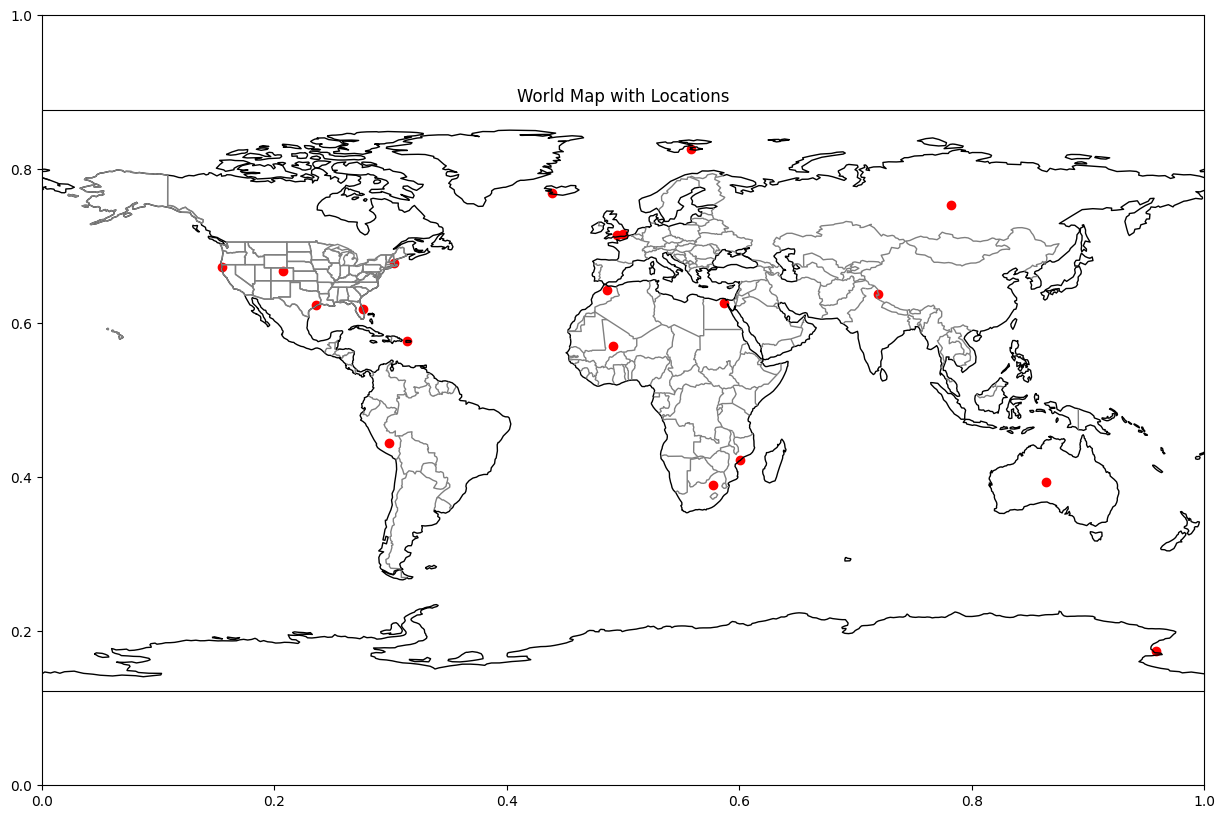

In [8]:
# Set up world map plot
fig = plt.subplots(figsize=(15, 10))
projection_map = ccrs.PlateCarree()
ax = plt.axes(projection=projection_map)
lon_west, lon_east, lat_south, lat_north = -180, 180, -90, 90
ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
ax.coastlines(color="black")
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor="grey")
    
# Plot Latitude/Longitude Location
longitudes = location_df["longitude"] # longitude
latitudes = location_df["latitude"]   # latitude
plt.scatter(longitudes, latitudes, c="red")

plt.title("World Map with Locations")
plt.show()

### United States Map

Map of the United States roughly from -130 to -60 and 20 to 60:
```
longitude east = -60

longitude west = -130

latitude north = 60

latitude south = 20
```

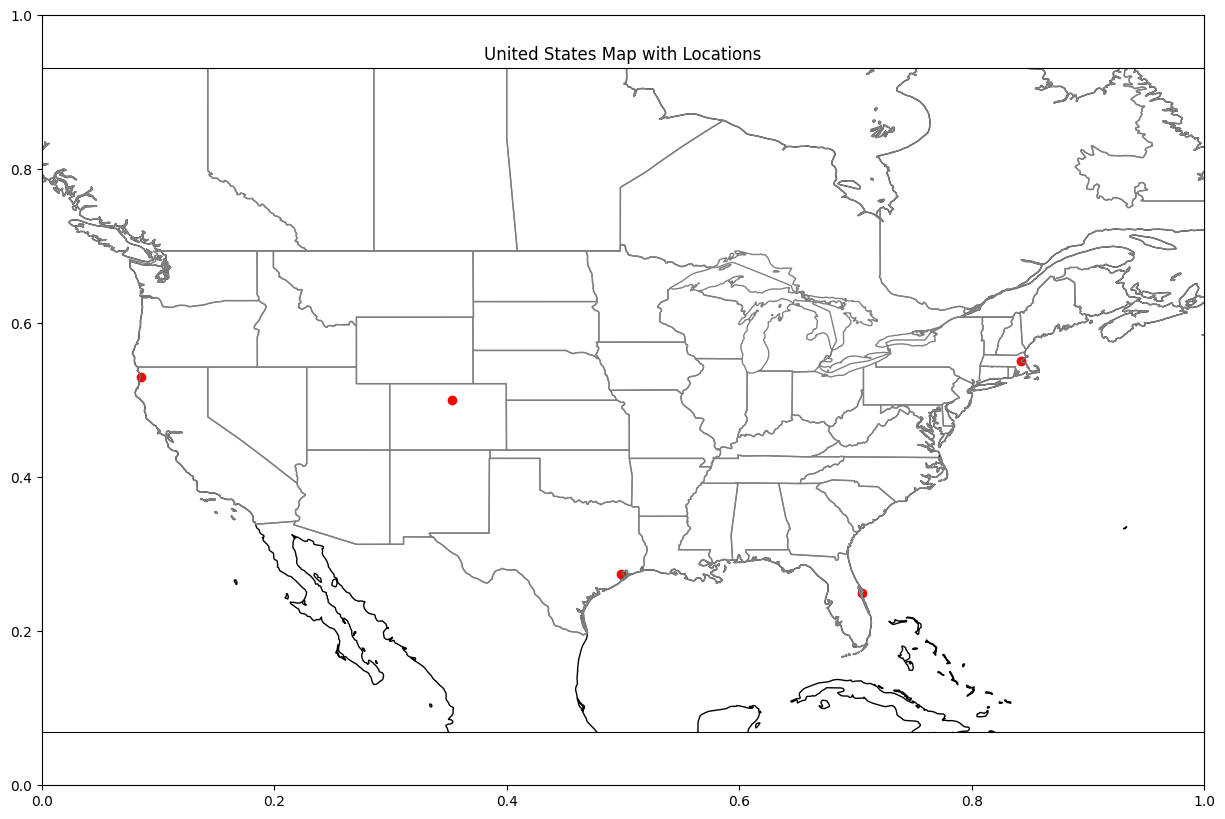

In [9]:
# Set up United States map plot
fig = plt.subplots(figsize=(15, 10))
projection_map = ccrs.PlateCarree()
ax = plt.axes(projection=projection_map)
lon_west, lon_east, lat_south, lat_north = -130, -60, 20, 60
ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
ax.coastlines(color="black")
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor="grey")
    
# Plot Latitude/Longitude Location
longitudes = location_df["longitude"] # longitude
latitudes = location_df["latitude"]   # latitude
plt.scatter(longitudes, latitudes, c="red")

plt.title("United States Map with Locations")
plt.show()

---

## Summary

Coordinates on the Earth are measured in many different types of coordinate systems: Geodesic (latitude/longitude), cartesian, spherical, and polar. These coordinates will make future calculations simpler by converting a 2D coordinate like latitude/longitude into a 3D space that can be used for vector calculations

In Python, coordinates can be mapped on to a world map via Matploblib and Cartopy

### What's next?

Great Circle arcs and paths


## Resources and references
